# Task details
Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.

# Evaluation Criteria
The best model should be the one that evaluates to have the lowest RMSE overall, and please indicate the error you get on validation set containing the last 100 observations.

# Expected Submission
Please submit a Kernel where the final cell outputs the RMSE score on the final 100 observations.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
X = df.loc[:,'GRE Score':'Research'].values
y = df.iloc[:,-1].values

Try different models: using Linear Regression, SGDRegressor, NN-MLP Regressor, support vector machine regression (linear and nonlinear)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lr = LinearRegression()
sgdr = SGDRegressor()
mlpreg = MLPRegressor(random_state=1, max_iter=100)
svrl = SVR(kernel='linear',C=0.01)
svrp = SVR(kernel='poly',degree=3,C=1)
rfreg = RandomForestRegressor()

models = {'LinReg':lr,'SGDReg':sgdr,'MLPreg':mlpreg,'SVRLinear':svrl,'SVRPoly':svrp,'RandomForest':rfreg}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=None)
scaler = StandardScaler()  #MinMaxScaler(feature_range=(0,1))

for name in models:
    regressor = models[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    predict = model.predict(X_test)
    rmse = mean_squared_error(y_test,predict, squared=False)
    
    print(name+': score - %1.3f, rmse - %1.4f'%(score,rmse))


LinReg: score - 0.801, rmse - 0.0634
SGDReg: score - 0.794, rmse - 0.0645
MLPreg: score - 0.353, rmse - 0.1143
SVRLinear: score - 0.761, rmse - 0.0694
SVRPoly: score - 0.636, rmse - 0.0857
RandomForest: score - 0.789, rmse - 0.0653


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

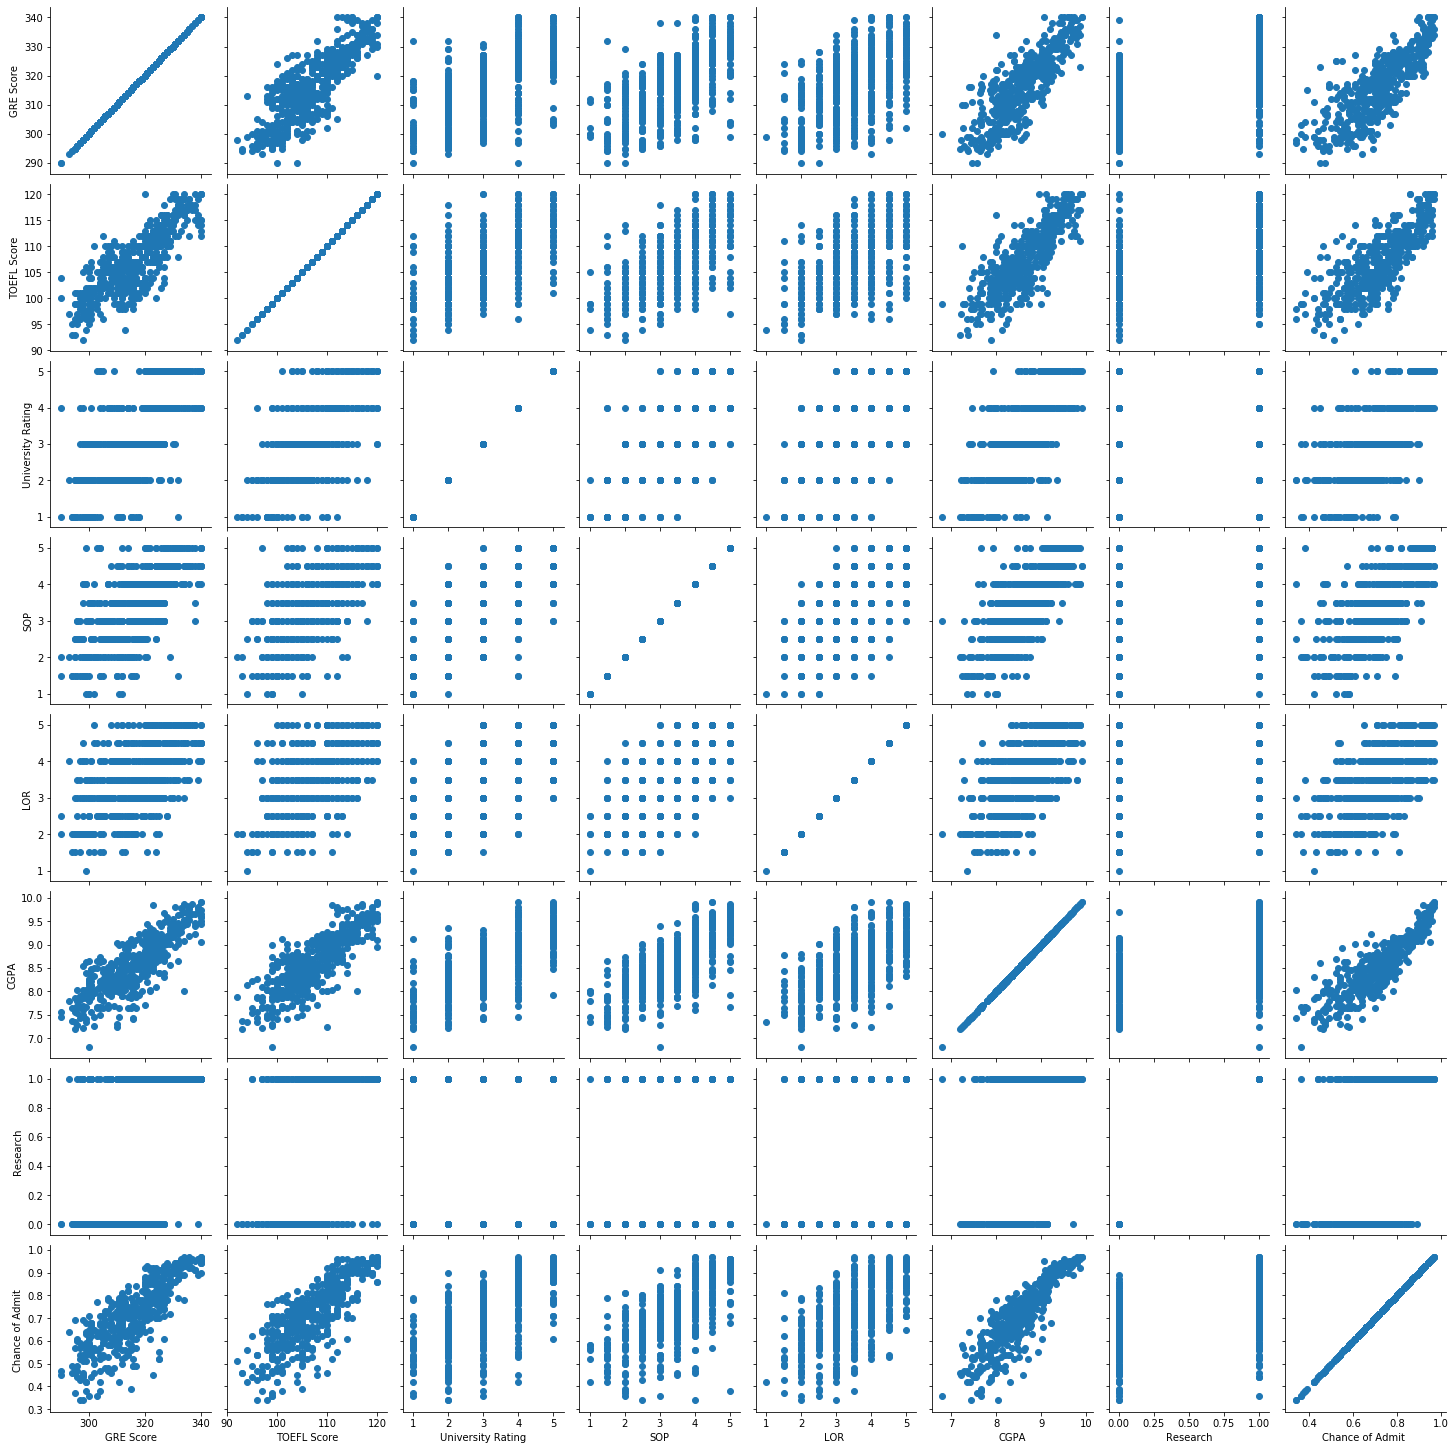

In [120]:
df1 = df.loc[:,'GRE Score':'Chance of Admit ']
g = sns.PairGrid(df1)
g.map(plt.scatter)

From this grid plot, we could infer a strong correlation between GRE and TOEFL scores as well as SOP, University rating and LOR. Hence, I choose drop to drop GRE score, University rating and LOR to improve training model perfomance.

In [5]:
X = df[['TOEFL Score','SOP','CGPA','Research']].values
y = df.iloc[:,-1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=None)
for name in models:
    regressor = models[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    predict = model.predict(X_test)
    rmse = mean_squared_error(y_test,predict, squared=False)
    
    print(name+': score - %1.3f, rmse - %1.4f'%(score,rmse))


LinReg: score - 0.820, rmse - 0.0581
SGDReg: score - 0.814, rmse - 0.0590
MLPreg: score - 0.670, rmse - 0.0786
SVRLinear: score - 0.732, rmse - 0.0709
SVRPoly: score - 0.693, rmse - 0.0758
RandomForest: score - 0.787, rmse - 0.0631
